In [143]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import time as time

name_col = ['Time','nox1','red1','nox2','red2','nox3','red3','temperature','humidity']

data = pd.read_csv("datalogger.csv",sep=';')
data.columns = name_col

Time = data['Time']
nox1 = data['nox1']
nox2 = data['nox2']
nox3 = data['nox3']
red1 = data['red1']
red2 = data['red2']
red3 = data['red3']
temperature = data['temperature']
humidity = data['humidity']

# Generador de datos reales

In [148]:
def generador_datos(beta, muestras, desviacion):
    e = np.random.randn(muestras) * desviacion
    y = nox1 * beta + e
    return y



# Recta de regresión
$\begin{align}
y  = \beta_0 + \beta_1x \\
\end{align}$

In [149]:
def linear_regression(x, y):
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    B0 = model.params[0]
    B1 = model.params[1]
    x=x.loc[:,'nox1':]
    
    
    x2 = np.linspace(x.min(), x.max(), 100)
    y_hat = x2 *B1 + B0
    plt.scatter(x, y, alpha=1)
    plt.plot(x2, y_hat, 'r', alpha=1)
    plt.title('Sensor Data vs Real Data')
    plt.xlabel('Real Pollution')
    plt.ylabel('Quantified value')
    return model, B0, B1

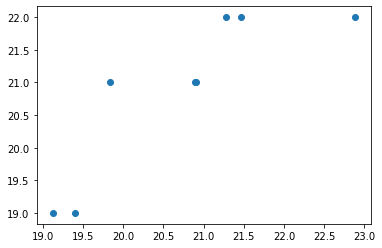

In [150]:
desviacion = 0.5 
n = nox1.count()
beta = 1
real_data = generador_datos(beta, n, desviacion)
plt.scatter(real_data,nox1)
plt.show() 

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1ef108be5c8>,
 2.893512097528493,
 0.8676476053846324)

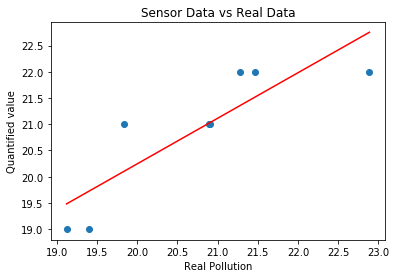

In [151]:
linear_regression(real_data,nox1)

In [117]:
import requests
import json

#Toda barcelona
#url = 'https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=c122329d-d26d-469e-bf9e-8efa10e4c127'

#Estaciones
url = ''
web_data_json = requests.get(url)
json_dict = json.loads(web_data_json.text)

#Toda barcelona
data_NO2 = json_dict["result"]["records"][2]["Codi_Contaminant"]
print(data_NO2)
#Estaciones


MissingSchema: Invalid URL '': No schema supplied. Perhaps you meant http://?